In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#######QUESTION 1########
#1.loading the data in pandas
df=pd.read_csv('hepatitis_csv.csv')

In [6]:
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [5]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [9]:
#2.Drop columns that aren’t useful.
columns_to_drop = ['protime', 'bilirubin']
df = df.drop(columns=columns_to_drop)

In [10]:
#3.dropping rows with missing coloumns
df=df.dropna()

In [11]:
#4.Create dummy variables.
df = pd.get_dummies(df, columns=['sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
                                 'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable',
                                 'spiders', 'ascites', 'varices', 'histology'], drop_first=True)


In [12]:
#5Take care of missing data.
df=df.fillna(df.median)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 5 to 154
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   80 non-null     int64  
 1   alk_phosphate         80 non-null     float64
 2   sgot                  80 non-null     float64
 3   albumin               80 non-null     float64
 4   class                 80 non-null     object 
 5   sex_male              80 non-null     bool   
 6   steroid_True          80 non-null     bool   
 7   antivirals_True       80 non-null     bool   
 8   fatigue_True          80 non-null     bool   
 9   malaise_True          80 non-null     bool   
 10  anorexia_True         80 non-null     bool   
 11  liver_big_True        80 non-null     bool   
 12  liver_firm_True       80 non-null     bool   
 13  spleen_palpable_True  80 non-null     bool   
 14  spiders_True          80 non-null     bool   
 15  ascites_True          80 non-

In [13]:
#7. Divide the data set into training data and test data.
# Separate features and target variable
X = df.drop('class', axis=1)  # Features
y = df['class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#6Convert the data frame to NumPy.
# Optionally, convert these splits to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [15]:
print(X_train_np.shape, X_test_np.shape, y_train_np.shape, y_test_np.shape)

(64, 17) (16, 17) (64,) (16,)


###QUESTION 2#####

a. Construct a CSV file with the following attributes:
Study time in hours of ML lab course (x)
Score out of 10 (y)
The dataset should contain 10 rows.

In [16]:
import pandas as pd

data = {
    'Study_time_hours': [2, 3, 5, 1, 4, 6, 3, 7, 8, 2],
    'Score_out_of_10': [5, 6, 8, 4, 7, 9, 6, 8, 9, 5]
}

df = pd.DataFrame(data)

df.to_csv('study_scores.csv', index=False)

print("CSV file 'study_scores.csv' created successfully.")


CSV file 'study_scores.csv' created successfully.


b. Create a regression model and display the following:
Coefficients: B0 (intercept) and B1 (slope)
RMSE (Root Mean Square Error)
Predicted responses

In [17]:
import numpy as np
import pandas as pd

df = pd.read_csv('study_scores.csv')

X = df['Study_time_hours'].values
y = df['Score_out_of_10'].values

#Pedhazur formula
X_mean = np.mean(X)
y_mean = np.mean(y)
XY_mean = np.mean(X * y)
X_squared_mean = np.mean(X ** 2)

# Compute B1 (slope) and B0 (intercept)
B1 = (XY_mean - X_mean * y_mean) / (X_squared_mean - X_mean ** 2)
B0 = y_mean - B1 * X_mean

# Compute predicted responses
y_pred = B0 + B1 * X

# Compute RMSE
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))


print(f"Intercept (B0): {B0:.2f}")
print(f"Slope (B1): {B1:.2f}")
print(f"RMSE: {RMSE:.2f}")

Intercept (B0): 3.74
Slope (B1): 0.72
RMSE: 0.51


Create a scatter plot of the data points in red color and plot the graph of x vs. predicted y in blue color.

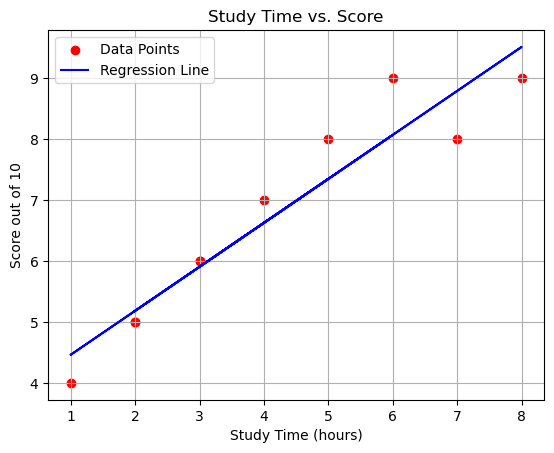

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='red', label='Data Points')

plt.plot(X, y_pred, color='blue', label='Regression Line')

plt.xlabel('Study Time (hours)')
plt.ylabel('Score out of 10')
plt.title('Study Time vs. Score')
plt.legend()
plt.grid(True)
plt.show()

d. Implement the model using two methods:
Pedhazur formula (intuitive)
Calculus method (partial derivatives, refer to class notes)


In [21]:
#Pedhazur formula already done in the above part
mat1=np.array([[len(X),np.sum(X)],[np.sum(X),np.sum(X**2)]])
mat2=np.array([[np.sum(y),np.sum(X*y)]])
coeffs=np.dot(np.linalg.inv(mat1),mat2.T)
b0_mat,b1_mat=coeffs[0,0],coeffs[1,0]

y_mat = b0_mat + b1_mat * X
squared_errors = (y - y_mat) ** 2
rmse_mat = np.sqrt(np.mean(squared_errors))

print(f"{b1_mat}x + {b0_mat}")
print(y_mat)
print(rmse_mat)

0.7218813905930483x + 3.740286298568506
[5.18404908 5.90593047 7.34969325 4.46216769 6.62781186 8.07157464
 5.90593047 8.79345603 9.51533742 5.18404908]
0.5116235835128636


e. Compare the coefficients obtained using both methods and compare them with the analytical solution.(in notes)

f. Test your model to predict the score obtained when the study time of a student is 10 hours.
Note: Do not use scikit-learn.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Study_time_hours']].values 
y = df['Score_out_of_10'].values 
model = LinearRegression()
model.fit(X, y)
B1 = model.coef_[0]
B0 = model.intercept_

y_sklearn = model.predict(X)
rmse_sklearn = np.sqrt(mean_squared_error(y, y_sklearn))


print(f"scikit-learn - B0 (Intercept): {B0}")
print(f"scikit-learn - B1 (Slope): {B1}")
print(y_sklearn)
print(rmse_sklearn)

scikit-learn - B0 (Intercept): 3.740286298568507
scikit-learn - B1 (Slope): 0.7218813905930471
[5.18404908 5.90593047 7.34969325 4.46216769 6.62781186 8.07157464
 5.90593047 8.79345603 9.51533742 5.18404908]
0.5116235835128632


Pedhazur Method - Intercept (B0): 40.18
Pedhazur Method - Slope (B1): 0.01
Pedhazur Method - RMSE: 12.42


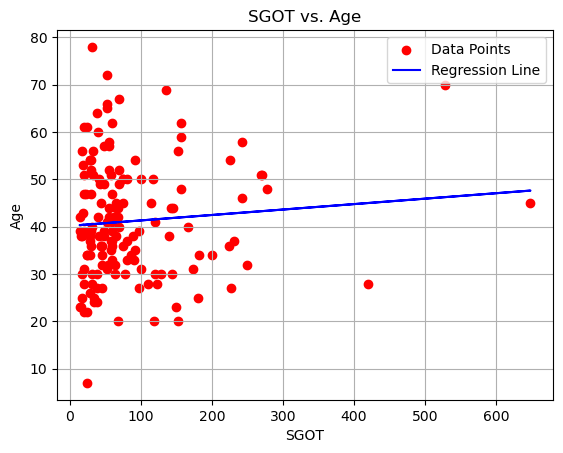

Matrix Method - Intercept (B0): -5665.69
Matrix Method - Slope (B1): 66.44
Matrix Method - RMSE: 5935.70
Coefficients comparison:
Pedhazur Method - Intercept (B0): 40.18, Slope (B1): 0.01
Matrix Method - Intercept (B0): -5665.69, Slope (B1): 66.44
Predicted Age for SGOT = 10 (Pedhazur Method): 40.30
Predicted Age for SGOT = 10 (Matrix Method): -5001.29


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('hepatitis_csv.csv')

# Select the features and target variable
# Example: predicting 'age' from 'sgot'
X = df[['sgot', 'age']].dropna()  # Drop rows where any of the selected columns have NaN values
y = X['age'].values
X = X[['sgot']].values  # Keep only the feature column

# Check if lengths match after dropping NaNs
assert len(X) == len(y), "Length mismatch after dropping NaNs"

# Add a constant column for the intercept
X_with_intercept = np.vstack([np.ones(len(X)), X[:, 0]]).T

# Step a: Calculate coefficients using Pedhazur formula
X_mean = np.mean(X_with_intercept, axis=0)
y_mean = np.mean(y)
XY_mean = np.mean(X_with_intercept[:, 1] * y)
X_squared_mean = np.mean(X_with_intercept[:, 1] ** 2)

# Compute B1 (slope) and B0 (intercept) using Pedhazur formula
B1 = (XY_mean - X_mean[1] * y_mean) / (X_squared_mean - X_mean[1] ** 2)
B0 = y_mean - B1 * X_mean[1]

# Compute predicted responses
y_pred = B0 + B1 * X_with_intercept[:, 1]

# Compute RMSE
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))

# Display coefficients and RMSE
print(f"Pedhazur Method - Intercept (B0): {B0:.2f}")
print(f"Pedhazur Method - Slope (B1): {B1:.2f}")
print(f"Pedhazur Method - RMSE: {RMSE:.2f}")

# Step b: Scatter plot and regression line
plt.scatter(X[:, 0], y, color='red', label='Data Points')
plt.plot(X_with_intercept[:, 1], y_pred, color='blue', label='Regression Line')
plt.xlabel('SGOT')
plt.ylabel('Age')
plt.title('SGOT vs. Age')
plt.legend()
plt.grid(True)
plt.show()

# Step c: Calculate coefficients using matrix method (calculus method)
# Create matrices for the normal equations
mat1 = np.array([[len(X), np.sum(X)], [np.sum(X), np.sum(X ** 2)]])
mat2 = np.array([[np.sum(y)], [np.sum(X * y)]])

# Compute coefficients using matrix inversion and multiplication
coeffs = np.dot(np.linalg.inv(mat1), mat2)
b0_mat, b1_mat = coeffs[0, 0], coeffs[1, 0]

# Compute predicted responses using matrix method
y_mat = b0_mat + b1_mat * X_with_intercept[:, 1]

# Compute RMSE for matrix method
squared_errors = (y - y_mat) ** 2
rmse_mat = np.sqrt(np.mean(squared_errors))

# Display coefficients and RMSE for matrix method
print(f"Matrix Method - Intercept (B0): {b0_mat:.2f}")
print(f"Matrix Method - Slope (B1): {b1_mat:.2f}")
print(f"Matrix Method - RMSE: {rmse_mat:.2f}")

# Step d: Compare coefficients and predictions
print(f"Coefficients comparison:")
print(f"Pedhazur Method - Intercept (B0): {B0:.2f}, Slope (B1): {B1:.2f}")
print(f"Matrix Method - Intercept (B0): {b0_mat:.2f}, Slope (B1): {b1_mat:.2f}")

# Predict y value for a given data point using both methods
study_time = 10
predicted_y_pedhazur = B0 + B1 * study_time
predicted_y_matrix = b0_mat + b1_mat * study_time
print(f"Predicted Age for SGOT = 10 (Pedhazur Method): {predicted_y_pedhazur:.2f}")
print(f"Predicted Age for SGOT = 10 (Matrix Method): {predicted_y_matrix:.2f}")
